In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble, learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\artem\PycharmProjects\MachineLearning\venv\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved.

In [2]:
K = 10
TREES_AMOUNT = 100
ANSWER_PATH = 'answers'

def write_single_answer(answer, task_number):
    answer_path = os.path.join(
        ANSWER_PATH,
        f"answer{task_number}.txt"
    )
    with open(answer_path, "w") as fout:
        fout.write(str(answer))

# Dataset Reading

In [3]:
digits = datasets.load_digits()
print(digits.keys())
X = digits['data']
y = digits['target']

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


# Decision Tree Clasifier

In [4]:
decision_tree_classifier = DecisionTreeClassifier()
scores = cross_val_score(decision_tree_classifier, X, y, cv=K)
average_score = scores.mean()
print(average_score)
write_single_answer(average_score, 1)

0.8259538045041637


# Bagging Classifier 

In [5]:
bagging_classifier = ensemble.BaggingClassifier(
    decision_tree_classifier,
    n_estimators=TREES_AMOUNT
)

scores = cross_val_score(bagging_classifier, X, y, cv=K)

average_score = scores.mean()
print(average_score)
write_single_answer(average_score, 2)

0.9265230905701826


# Bagging Classifier (amount of features is equal to $\sqrt d$)

In [6]:
feature_amount = X.shape[1]
max_features = int(np.sqrt(feature_amount))

bagging_classifier = ensemble.BaggingClassifier(
    decision_tree_classifier,
    n_estimators=TREES_AMOUNT,
    max_features=max_features
)

scores = cross_val_score(bagging_classifier, X, y, cv=K)

average_score = scores.mean()
print(average_score)
write_single_answer(average_score, 3)

0.9332526718416274


# Random Forest as combination of Decision Tree and Bagging classifiers

In [7]:
decision_tree_classifier = DecisionTreeClassifier(max_features=max_features)
bagging_classifier = ensemble.BaggingClassifier(
    decision_tree_classifier,
    n_estimators=TREES_AMOUNT
)

scores = cross_val_score(bagging_classifier, X, y, cv=K)

average_score = scores.mean()
print(average_score)
write_single_answer(average_score, 4)

0.9516713016565855


# Random Forest

In [8]:
random_forest_classifier = ensemble.RandomForestClassifier(
    n_estimators=TREES_AMOUNT,
    max_features=max_features
)
scores = cross_val_score(random_forest_classifier, X, y, cv=K)
average_score = scores.mean()
print(average_score)

0.9538853673209566


# Random Forest analysis

In [9]:
def plot_factor_dependence(x, y, title):
    plt.figure()
    plt.title(title)
    plt.plot(x, y, color='green')
    plt.show()

In [10]:
trees_amount_range = np.arange(5, 100, 10)
features_amount_range = np.arange(1, 45, 5)
max_depth_range = np.arange(1, 100, 10)

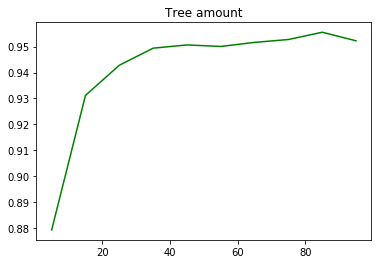

In [11]:
tree_scores = list()
for tree_amount in trees_amount_range:
    random_forest_classifier = ensemble.RandomForestClassifier(
        n_estimators=tree_amount,
        max_features=max_features
    )
    scores = cross_val_score(random_forest_classifier, X, y, cv=K)
    average_score = scores.mean()
    tree_scores.append(average_score)
plot_factor_dependence(trees_amount_range, tree_scores, "Tree amount")

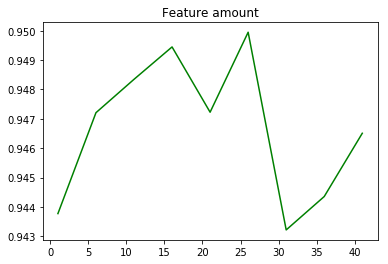

In [12]:
feature_scores = list()
for feature_amount in features_amount_range:
    random_forest_classifier = ensemble.RandomForestClassifier(
        n_estimators=TREES_AMOUNT,
        max_features=feature_amount
    )
    scores = cross_val_score(random_forest_classifier, X, y, cv=K)
    average_score = scores.mean()
    feature_scores.append(average_score)
plot_factor_dependence(features_amount_range, feature_scores, "Feature amount")

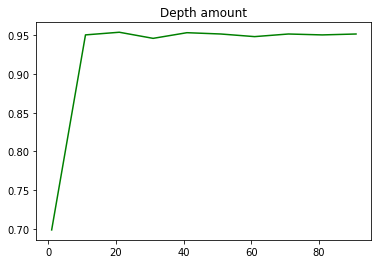

In [13]:
depth_scores = list()
for depth in max_depth_range:
    random_forest_classifier = ensemble.RandomForestClassifier(
        n_estimators=TREES_AMOUNT,
        max_features=max_features,
        max_depth=depth
    )
    scores = cross_val_score(random_forest_classifier, X, y, cv=K)
    average_score = scores.mean()
    depth_scores.append(average_score)
plot_factor_dependence(max_depth_range, depth_scores, "Depth amount")